In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
import gosdt

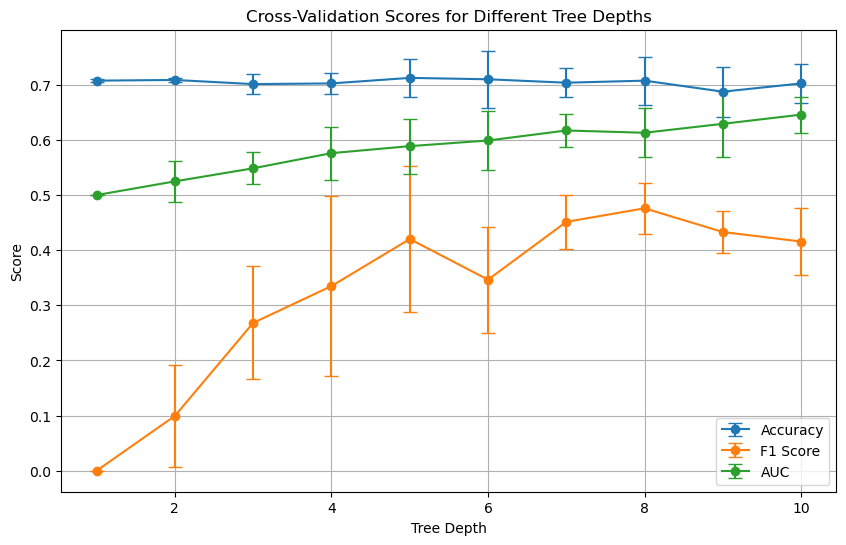

In [29]:
file_path = 'german_credit.csv'
data = pd.read_csv(file_path)

X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

depths = range(1, 11)
accuracy_scores = []
f1_scores = []
auc_scores = []
accuracy_errors = []
f1_errors = []
auc_errors = []

# Use Stratified K-Fold because of class imbalance
skf = StratifiedKFold(n_splits=5, shuffle=True)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    
    accuracy_cv = cross_val_score(clf, X_train, y_train, cv=skf, scoring=make_scorer(accuracy_score))
    f1_cv = cross_val_score(clf, X_train, y_train, cv=skf, scoring=make_scorer(f1_score))
    auc_cv = cross_val_score(clf, X_train, y_train, cv=skf, scoring=make_scorer(roc_auc_score))
    
    accuracy_scores.append(np.mean(accuracy_cv))
    f1_scores.append(np.mean(f1_cv))
    auc_scores.append(np.mean(auc_cv))
    
    accuracy_errors.append(np.std(accuracy_cv))
    f1_errors.append(np.std(f1_cv))
    auc_errors.append(np.std(auc_cv))

plt.figure(figsize=(10, 6))
plt.errorbar(depths, accuracy_scores, yerr=accuracy_errors, label="Accuracy", marker='o', capsize=5)
plt.errorbar(depths, f1_scores, yerr=f1_errors, label="F1 Score", marker='o', capsize=5)
plt.errorbar(depths, auc_scores, yerr=auc_errors, label="AUC", marker='o', capsize=5)

plt.xlabel('Tree Depth')
plt.ylabel('Score')
plt.title('Cross-Validation Scores for Different Tree Depths')
plt.legend()
plt.grid(True)
plt.show()

Applying GridSearch 5-fold cross validation on max depth, min samples split, and min samples leaf on the training dataset. Then trained a new decision tree on the entire training set using the best parameter combination chosen during cross-validation.

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5}
F1-Score: 0.3441
Accuracy: 0.6950
AUC: 0.5802


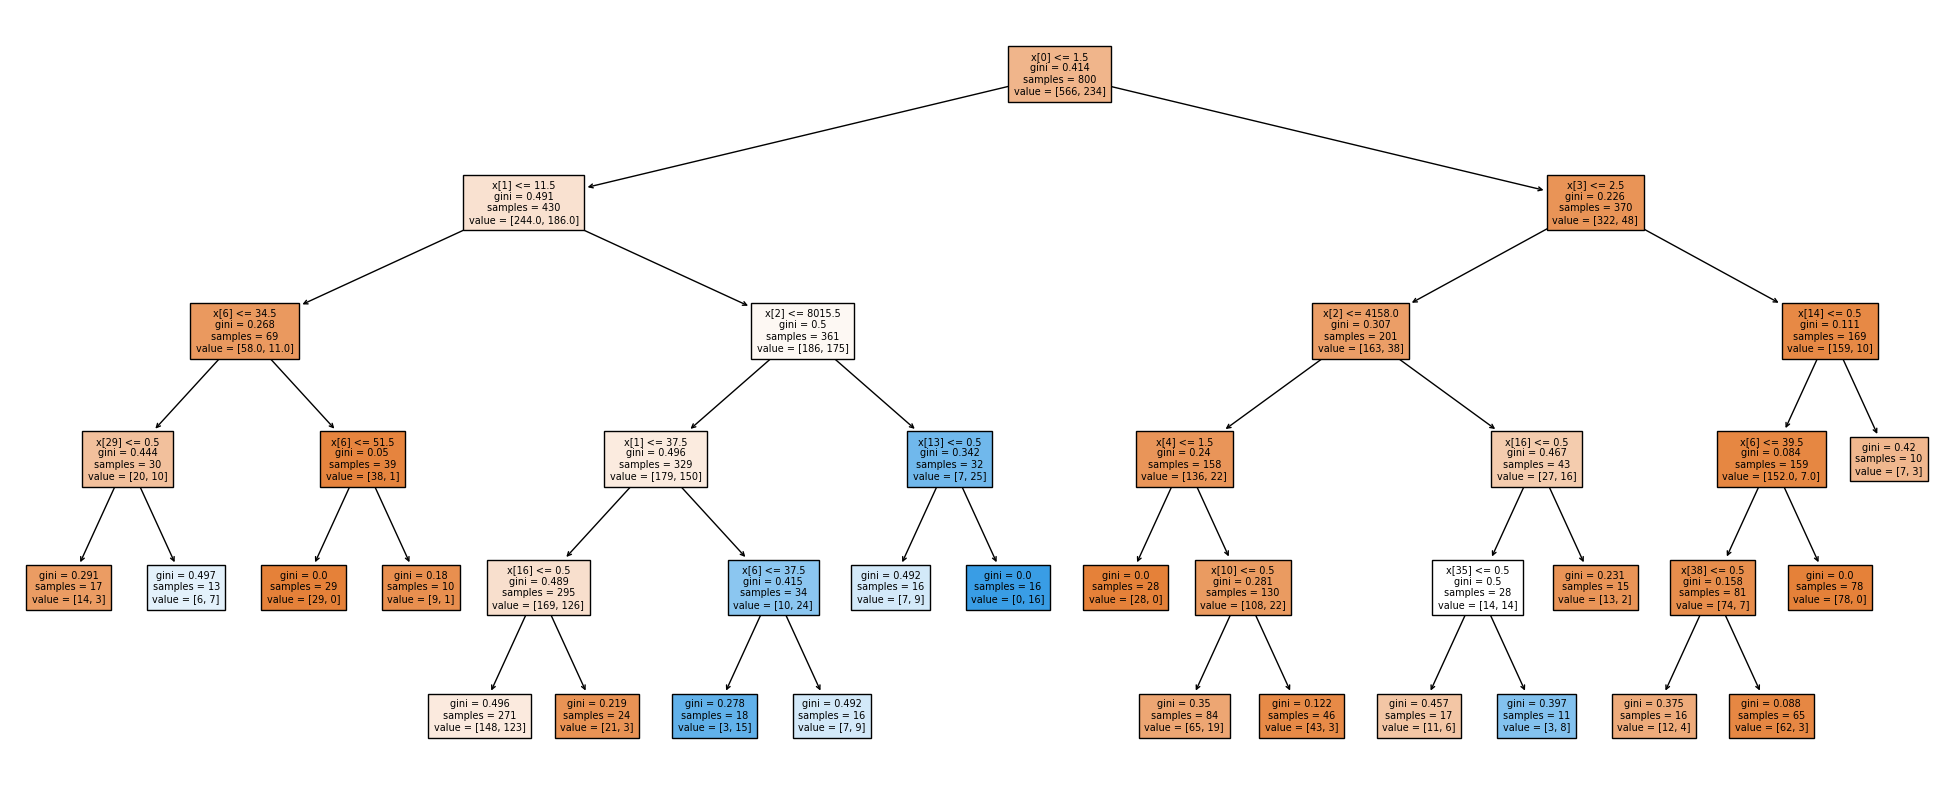

In [30]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    return_train_score=True
)

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

# Train the DecisionTreeClassifier on the entire training set with the best params
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {roc_auc:.4f}")

plt.figure(figsize=(25, 10))
plot_tree(best_tree, filled=True, fontsize=7)
plt.show()